In [1]:
import numpy as np
import pandas as pd
# from projToolBox import *

df=pd.read_csv("dataset/zomato_dataset.csv")
df.head(2)

,Restaurant Name,Rating,Cuisine,Average Price,Average Delivery Time,Safety Measure,Location
0,Campus Bakers,4.3,"Bakery, Fast Food, Pizza, Sandwich, Burger",₹50 for one,36 min,Restaurant partner follows WHO protocol,Agra
1,Mama Chicken Mama Franky House,4,"North Indian, Mughlai, Rolls, Burger, Momos",₹50 for one,22 min,Follows all Max Safety measures to ensure your...,Agra


# Data Cleaning

In [2]:
# # Handling NaN values
# from sklearn.impute import SimpleInputer
# si=SimpleInputer()

# cancel all space from column names, in order to access them easier with . operator
def cancelSpace():
    df.columns = [e.replace(' ','') for e in df.columns]
    print('spaces in columns names were stripped')
    print('df.columns=',df.columns)
    return df.columns

cancelSpace()

# setting df.Rating, df.AveragePrice into numerical values
df.Rating=pd.to_numeric(df.Rating,errors='coerce')
df.dropna(subset='Rating',inplace=True)
df.sort_values('Rating',ascending=False,inplace=True)

from projToolBox import separator
try:
    df.reset_index(inplace=True)
except ValueError:
    separator()
    print('Just click RUN ALL BLOCKS inside Jupyter Notebook would be fine. Otherwise it will generate level_0 column for resetted index col')
    separator()


spaces in columns names were stripped
df.columns= Index(['RestaurantName', 'Rating', 'Cuisine', 'AveragePrice',
       'AverageDeliveryTime', 'SafetyMeasure', 'Location'],
      dtype='object')


C:\Users\Fynn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Feature Engineering

<Axes: title={'center': 'Distribution of Rating'}, ylabel='Frequency'>

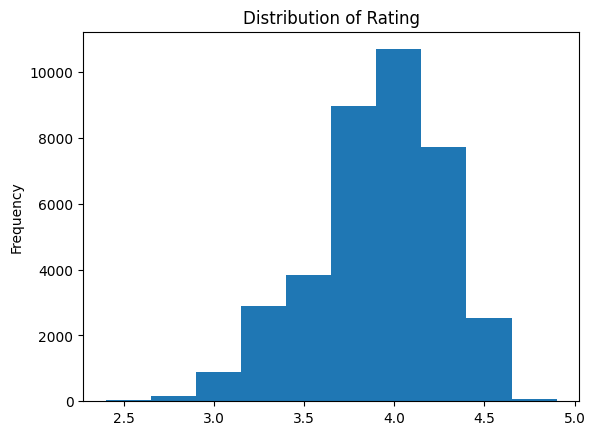

In [3]:
df.Rating.plot(kind='hist',title="Distribution of Rating") # automatically set count to ylabel. Nice!

In [4]:
from sklearn.model_selection import train_test_split
